# Sentiment Analysis

We've already demonstrated how to train a character-level RNN to create original text. In this chapter, we create a **word-level** to analyze sentiment.

Sentiment analysis is a common NLP task. **Sentiment analysis** computationally identifies and categorizes opinions expressed in a text corpus to determine attitude or sentiment. Typically, sentiment analysis is used to determine a positive, negative or neutral opinion towards a particular topic or product. This technique is widely applied to reviews, surveys, and documents.

Resource:

https://www.tensorflow.org/tutorials/keras/text_classification

# IMDb Dataset

A popular dataset used to practice NLP is the IMDb reviews dataset. **IMDb** is a benchmark dataset for binary sentiment classification. The dataset contains 50,000 movie reviews labeled as either positive (1) or negative (0). Reviews are preprocessed with each encoded as a sequence of word indexes in the form of integers. Words within the reviews are indexed by their overall frequency within the dataset. The 50,000 reviews are split into 25,000 for training and 25,000 for testing. So, we can predict the number of positive and negative reviews using either classification or other deep learning algorithms.

IMDb is popular because it is simple to use, relative easy to process, and challenging enough for machine learning aficionados. We enjoy working with IMDb because it's just fun to work with movie data.

# Import **tensorflow** Library

Import tensorflow library and alias as **tf**:

In [1]:
import tensorflow as tf

# GPU Hardware Accelerator

To vastly speed up processing, we can use the GPU available from the Google Colab cloud service. Colab provides a free Tesla K80 GPU of about 12 GB. It’s very easy to enable the GPU in a Colab notebook:

1.	click **Runtime** in the top left menu
2.	click **Change runtime** type from the drop-down menu
3.	choose **GPU** from the Hardware accelerator drop-down menu
4.	click **SAVE**

Verify that GPU is active:

In [2]:
tf.__version__, tf.test.gpu_device_name()

('2.4.0', '/device:GPU:0')

If '/device:GPU:0' is displayed, the GPU is active. If '..' is displayed, the regular CPU is active.

# Download the IMDB dataset

Download, extract the dataset, and explore the directory structure:

In [3]:
import os

url = 'https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz'

dataset = tf.keras.utils.get_file('aclImdb_v1.tar.gz', url,
                                    untar=True, cache_dir='.',
                                    cache_subdir='')

dataset_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')

# Explore IMDB

Create a function to display directories:

In [4]:
def see_contents(dir):
  print (os.listdir(dir))

Display the contents of 'ac1Imdb':

In [5]:
see_contents(dataset_dir)

['imdb.vocab', 'train', 'test', 'README', 'imdbEr.txt']


The name of the dataset we download is 'ac1Imdb'.

# Explore the Train and Test Directories

Explore the contents of the train directory:

In [6]:
train_dir = os.path.join(dataset_dir, 'train')
d = see_contents(train_dir)
d

['unsup', 'urls_neg.txt', 'pos', 'neg', 'urls_pos.txt', 'unsupBow.feat', 'urls_unsup.txt', 'labeledBow.feat']


We now know the contents of the 'ac1Imdb/train' directory. To explore the contents of the directories, begin by returning an iterator:

In [7]:
from pathlib import Path

for path in Path('.').iterdir():
  print(path)

.config
aclImdb
aclImdb_v1.tar.gz.tar.gz
sample_data


**iterdir()** returns an path iterator for the current directory.

Since the current directory is 'ac1Imdb', we know that the train path is 'ac1Imdb/train'. So we can accesss positive and negative reviews from 'aclImdb/train/pos' and 'aclImdb/train/neg' respectively. Let's see a few positive reviews: 

In [8]:
files = Path('aclImdb/train/pos').iterdir()

for i, row in enumerate(files):
  if i < 5:
    print (row)

aclImdb/train/pos/25_7.txt
aclImdb/train/pos/2348_10.txt
aclImdb/train/pos/4392_9.txt
aclImdb/train/pos/2822_7.txt
aclImdb/train/pos/5810_9.txt


We can also use the function we created to return postive reviews:

In [9]:
see_contents('aclImdb/train/pos')

['25_7.txt', '2348_10.txt', '4392_9.txt', '2822_7.txt', '5810_9.txt', '5583_8.txt', '1804_10.txt', '9340_8.txt', '3792_8.txt', '7915_8.txt', '10168_8.txt', '10212_8.txt', '7130_10.txt', '1476_10.txt', '3520_9.txt', '3775_7.txt', '532_9.txt', '9141_8.txt', '948_10.txt', '5125_7.txt', '7653_10.txt', '4372_10.txt', '8539_8.txt', '8450_7.txt', '12371_8.txt', '7000_7.txt', '4065_10.txt', '2941_10.txt', '8310_10.txt', '1602_9.txt', '476_7.txt', '8817_8.txt', '4580_8.txt', '2214_10.txt', '2613_9.txt', '4211_8.txt', '3060_10.txt', '5379_7.txt', '3013_8.txt', '9803_7.txt', '5111_10.txt', '1652_10.txt', '9165_10.txt', '7674_10.txt', '6850_7.txt', '8728_7.txt', '586_10.txt', '647_10.txt', '2539_10.txt', '11915_10.txt', '7547_10.txt', '2656_10.txt', '10655_9.txt', '5991_8.txt', '6793_10.txt', '10409_10.txt', '4712_7.txt', '7490_8.txt', '730_7.txt', '8769_7.txt', '3934_8.txt', '8055_8.txt', '10762_10.txt', '8830_8.txt', '2412_10.txt', '4645_9.txt', '6267_10.txt', '1311_10.txt', '1827_10.txt', '198_

Create a list of positive reviews from the iterator, convert the first example to a string, and strip off extraneous directory information:

In [11]:
pos_reviews = list(Path('aclImdb/train/pos').iterdir())
first = str(pos_reviews[0])
first = first[14:]
first

'pos/25_7.txt'

Explore the first review:

In [12]:
sample_file = os.path.join(train_dir, first)
with open(sample_file) as f:
  print (f.read())

I never saw this when I was a kid, so this was seen with fresh eyes. I had never heard of it and rented it for my 5 year old daughter. Plus, the idea of Christopher Walken singing and dancing made me curious. The special fx are cheesy and the singing and dancing is mediocre. But the story is great. My daughter was entranced. I loved watching Walken in this role thinking about what the future held for him. Very amusing to see him dance! And if the songs weren't great, at least they weren't Disney over-produced saccharine sweetness. The ogre scene in the beginning was a little scary for her, and she was a little nervous when we saw him again at the end, but it was mostly benign. Interestingly, we had recently read "Puss in Boots", and I had wondered about the implausibility of the story. But while staying true to almost every aspect, Walken's acting made it believable. Great fun. I'd watch it again with my daughter.


Display the first five positive reviews:

In [13]:
r = []
for i in range(5):
  review = first = str(pos_reviews[i])
  review = review [14:]
  review = os.path.join(train_dir, review)
  with open(review) as f:
    print ('review', i, ':', f.read())

review 0 : I never saw this when I was a kid, so this was seen with fresh eyes. I had never heard of it and rented it for my 5 year old daughter. Plus, the idea of Christopher Walken singing and dancing made me curious. The special fx are cheesy and the singing and dancing is mediocre. But the story is great. My daughter was entranced. I loved watching Walken in this role thinking about what the future held for him. Very amusing to see him dance! And if the songs weren't great, at least they weren't Disney over-produced saccharine sweetness. The ogre scene in the beginning was a little scary for her, and she was a little nervous when we saw him again at the end, but it was mostly benign. Interestingly, we had recently read "Puss in Boots", and I had wondered about the implausibility of the story. But while staying true to almost every aspect, Walken's acting made it believable. Great fun. I'd watch it again with my daughter.
review 1 : This show is quick-witted, colorful, dark yet fun,

Display the first five negative reviews:

In [14]:
neg_reviews = list(Path('aclImdb/train/neg').iterdir())

r = []
for i in range(5):
  review = first = str(neg_reviews[i])
  review = review [14:]
  review = os.path.join(train_dir, review)
  with open(review) as f:
    print ('review', i, ':', f.read())

review 0 : There was a genie played by Shaq His name was Kazaam, and he was whack His rhymes were corny, this lines were bad some stupid kid cryin over his stupid dad bad actin, bad casting, bad special effects whats next? this movie sucks Prolly didn't make 20 bucks he lives in a boombox not a lamp hurts like a cramp like a wet food stamp...<br /><br />Yeah, you get it, a stupid rhyming genie who can't act, in a stupid movie with horrible special effects. Oh, and its confusing as hell. I'm not even gonna go on. Let's just say, it belongs in the "its so bad, its funny" category. Watch it once with your buddies and get a good laugh. But don't expect anything spectacular.
review 1 : Okay so I went into this movie not really expecting much I figured an action flick similar to The Fast and the Furious. Some nice cars some nice girls somewhat of a decent plot. Unfortunately I would have to say that this was probably the worst movie I have seen this year. Don't get me wrong the cars were nic

# Load the Dataset

Load the data off disk and prepare it into a format suitable for training. To do so, use the helpful text_dataset_from_directory utility, which expects a directory structure as follows:

main_directory/
* ...class_a/
* ......a_text_1.txt
* ......a_text_2.txt
* ...class_b/
* ......b_text_1.txt
* ......b_text_2.txt

To prepare a dataset for binary classification, we need two folders on disk corresponding to class_a and class_b. In our case, the two folders are the positive and negative movie reviews found in 'aclImdb/train/pos' and 'aclImdb/train/neg' respectively. As the IMDB dataset contains additional folders, remove them before using the utility.

In [15]:
import shutil

remove_dir = os.path.join(train_dir, 'unsup')
shutil.rmtree(remove_dir)

## Load the Splits

Use the **text_dataset_from_directory** utility to create a labeled tf.data.Dataset. For a machine learning experiment, best practice is to divide into three splits: train, validation, and test.

The IMDB dataset is already divided into train and test, but lacks a validation set. Let's create a train set using an 80:20 split of the training data by using the validation_split argument:

In [16]:
BATCH_SIZE = 32
seed = 0

raw_train_ds = tf.keras.preprocessing.text_dataset_from_directory(
  'aclImdb/train',
  batch_size=BATCH_SIZE,
  validation_split=0.2,
  subset='training',
  seed=seed)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.


The training folder contains 25,000 examples. The training set contains 20,000 examples or 80% of the total. The 'aclImdb/train' directory signals the utililty to draw data from the training folder.

Display examples from the first batch:

In [17]:
for text_batch, label_batch in raw_train_ds.take(1):
  for i in range(3):
    print ('Review:', text_batch.numpy()[i])
    print ('Label:', label_batch.numpy()[i])

Review: b"Violence whether real or not always has an impact. In this film the violence is about as crass as you could ask for. In the Great Ecstacy the director has successfully demonstrated what extremes of violence people are capable of. But what was the point? The violence looks like a mix of No\xc3\xab's 'Irreversible, and ' Kubrick's 'Clockwork Orange'...both of which are remarkable films. Don't get me wrong, I'm not opposed to screen violence at all and I've seen some nasty stuff in my film-going years, but this film as a whole is totally juvenile. The story is never developed enough to offer any reason for the extreme violence, the rizla paper thin reason we are give for Robert's demise is his introduction to drugs. Danny Dyer plays the character who is partly responsible for Robert's drug fuelled demise, however he is on screen for less than 5 minutes. Lesley Manville is Robert's unable to cope mum, I am not sure what either of these actors is doing in a film of this low calibe

Batch size is 32, but we just take three examples from it. Lable of '1' is a positive review and label of '0' is a negative one.

Reviews contain raw text (with punctuation and occasional HTML tags. We deal with this later in this notebook.

Verify label names:

In [18]:
print ('Label 0 corresponds to', raw_train_ds.class_names[0])
print ('Label 1 corresponds to', raw_train_ds.class_names[1])

Label 0 corresponds to neg
Label 1 corresponds to pos


Create a validation set with 5,000 reviews:

In [19]:
raw_val_ds = tf.keras.preprocessing.text_dataset_from_directory(
    'aclImdb/train', 
    batch_size=BATCH_SIZE, 
    validation_split=0.2, 
    subset='validation', 
    seed=seed)

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


The 'aclImdb/train' directory signals the utility to draw data from the training folder. The subset of 'validation' signals the utility to draw the remaining 5,000 examples from the training folder.

**Note:** when using the validation_split and subset arguments, either specify a random seed or pass shuffle=False to ensure that validation and training splits have no overlap.

Create the test set with 25,000 reviews:

In [20]:
raw_test_ds = tf.keras.preprocessing.text_dataset_from_directory(
    'aclImdb/test', 
    batch_size=BATCH_SIZE)

Found 25000 files belonging to 2 classes.


The 'aclImdb/test' directory signals the utility to draw all 25,000 examples from the test folder.

# Prepare the Dataset for Training

Standardize, tokenize, and vectorize the data using the preprocessing TextVectorization layer.

**Standardization** refers to preprocessing the text, typically to remove punctuation or HTML elements to simplify the dataset. **Tokenization** refers to splitting strings into tokens. For example, splitting a sentence into individual words and/or splitting on whitespace. **Vectorization** refers to converting tokens into numbers so they can be fed into a neural network.

Reviews contain various HTML tags. Such tags are not removed by the default standardizer in the TextVectorization layer (which converts text to lowecase and strips punctuation by default, but doesn't strip HTML). We write a custom standardization function to remove the HTML.

Create the custom standardization function:

In [21]:
def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)
  stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
  return stripped_html

Create a TextVectorization layer to standardize, tokenize, and vectorize the data. Set the output_mode to **int** to create unique integer indices for each token. Use the default split function and the custom standardization function. Define an explicit maximum sequence_length that causes the layer to pad or truncate sequences to exactly sequence_length values.

In [22]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

max_features = 10000
sequence_length = 250

vectorizer = TextVectorization(
  standardize=custom_standardization,
  max_tokens=max_features,
  output_mode='int',
  output_sequence_length=sequence_length)

Call **adapt** to fit the state of the preprocessing layer to the dataset, which causes the model to build an index of strings to integers:

In [23]:
train_text = raw_train_ds.map(lambda x, y: x)
vectorizer.adapt(train_text)

Make a text-only dataset (without labels), then call adapt.

Create a function to tokenize text:

In [24]:
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorizer(text), label

Retrieve a batch (32 reviews and labels) from the dataset:

In [25]:
for txt, lbl in raw_train_ds.take(1):
  print (txt[0])
  print (vectorize_text(txt[0], lbl[0]))

tf.Tensor(b'This is what makes me proud to be British. This is by far the funniest thing on TV. The league consists of Jeremy dyson, Steve pemberton, mark gatiss and the lovely Reece shearsmith. Totally underrated, this horror-comedy is perfection. The characters are iconic and the catchphrases bizarre, "Hello Dave". It is a comedy that everyone simply must watch.<br /><br />The best thing about the league of gentlemen is that it is always fresh, and always pushing the boundaries. It does not need to rely on catchphrases(unlike little Britain) for it to be funny. the fact that the league are willing to kill off arguably their most famous and iconic characters, shows us that they\'ve got balls of steel.', shape=(), dtype=string)
(<tf.Tensor: shape=(1, 250), dtype=int64, numpy=
array([[  10,    7,   47,  144,   88, 2992,    6,   27,    1,   10,    7,
          30,  226,    2, 1463,  172,   18, 2332,    2, 3235, 2959,    5,
        3804,    1, 1226,    1, 1128,    1,    4,    2, 1473,    

We used **take** a  batch of reviews and labels. We display the first review from the batch as text and vectorized. We also display the first label.

Alternatively, we can retreive the first batch as an iterator:

In [26]:
text_batch, label_batch = next(iter(raw_train_ds))
first_review, first_label = text_batch[0], label_batch[0]
print ('Review', first_review)
print ('Label', raw_train_ds.class_names[first_label])
print ('Vectorized review', vectorize_text(first_review, first_label))

Review tf.Tensor(b"This was really a very bad movie. I am a huge fan of Italian Horror, Argento, Mario Bava, Fulci and yes, even our good friend here Lamberto sometimes comes out with a good one. I found the first two 'Demons' films to be highly entertaining - they were so bad they were great but this one is just so bad that it is really, really bad. It is intensely boring, the story never goes anywhere and I hated the characters - the wife slapping husband and whiny cry-baby pain in the *** wife drove me mad, there was nowhere near enough of the story devoted to the Ogre who was probably the best actor in the whole film. I turned it off about three quarters of the way through because I was very, very BORED! Don't bother.", shape=(), dtype=string)
Label neg
Vectorized review (<tf.Tensor: shape=(1, 250), dtype=int64, numpy=
array([[  10,   13,   60,    3,   50,   96,  103,    9,  223,    3,  585,
         369,    5, 1155, 2856,    1, 4833,    1, 5702,    4,  588,   53,
         239,   5

Use the **get_vocabulary** method to decode tokens:

In [27]:
print ('5479 ---> ', vectorizer.get_vocabulary()[5479])
print ('7185 ---> ', vectorizer.get_vocabulary()[7185])
print ('Vocabulary size: {}'.format(len(vectorizer.get_vocabulary())))

5479 --->  charming,
7185 --->  landscapes
Vocabulary size: 10000


#  Build the Input Pipeline

Vectorize splits:

In [28]:
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

Create the input pipeline:

In [29]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Buld the Model

Establish embedding dimensions:

In [30]:
embedding_dim = 16

Import libraries:

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout,\
GlobalAveragePooling1D

Create model:

In [32]:
model = Sequential([
  Embedding(max_features + 1, embedding_dim),
  Dropout(0.2),
  GlobalAveragePooling1D(),
  Dropout(0.2),
  Dense(1)])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160016    
_________________________________________________________________
dropout (Dropout)            (None, None, 16)          0         
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


# Compile Model

Compile with **tf.keras.losses.BinaryCrossentropy(from_logits=True)**:

In [33]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.0))

The loss function is binary because the choice is binary (positive or negative).

# Train

Train model for ten epochs:

In [34]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/10
625/625 [==============================] - 9s 14ms/step - loss: 0.6847 - binary_accuracy: 0.6236 - val_loss: 0.6280 - val_binary_accuracy: 0.7542
Epoch 2/10
625/625 [==============================] - 3s 5ms/step - loss: 0.5982 - binary_accuracy: 0.7690 - val_loss: 0.5211 - val_binary_accuracy: 0.8078
Epoch 3/10
625/625 [==============================] - 3s 5ms/step - loss: 0.4917 - binary_accuracy: 0.8222 - val_loss: 0.4460 - val_binary_accuracy: 0.8374
Epoch 4/10
625/625 [==============================] - 3s 5ms/step - loss: 0.4193 - binary_accuracy: 0.8489 - val_loss: 0.4012 - val_binary_accuracy: 0.8480
Epoch 5/10
625/625 [==============================] - 3s 5ms/step - loss: 0.3703 - binary_accuracy: 0.8688 - val_loss: 0.3720 - val_binary_accuracy: 0.8520
Epoch 6/10
625/625 [==============================] - 3s 5ms/step - loss: 0.3357 - binary_accuracy: 0.8775 - val_loss: 0.3522 - val_binary_accuracy: 0.8580
Epoch 7/10
625/625 [==============================] - 3s 5ms/st

# Evaluate the Model

Generalize:

In [35]:
model.evaluate(test_ds)

782/782 [==============================] - 7s 9ms/step - loss: 0.3260 - binary_accuracy: 0.8642


[0.326048880815506, 0.8641600012779236]

# Visualize

Create a plot of accuracy and loss over time. **model.fit()** returns a history object that contains a dictionary that holds everything that happened during training.

In [37]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

Plot loss:

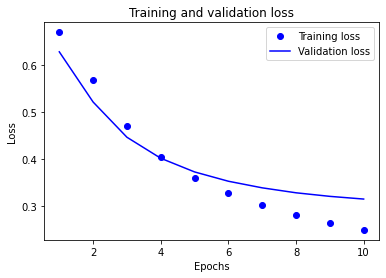

In [39]:
import matplotlib.pyplot as plt

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Plot accuracy:

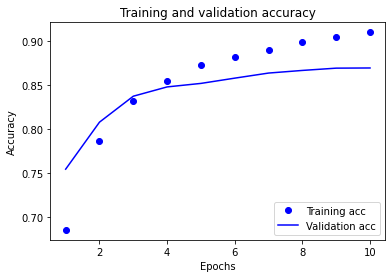

In [40]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

# Predict

Create a function to vectorize text:

In [43]:
def vectorize_example(text):
  text = tf.expand_dims(text, -1)
  return vectorizer(text)

Make a prediction:

In [44]:
review = ('Just loved it. My kids thought the movie was cool. '
         'Even my wife liked it. Would recommend it to anyone.')

v_review = vectorize_example(review)
v_review

pred = model.predict(v_review)
pred, pred.shape

(array([[0.84088266]], dtype=float32), (1, 1))

If prediction is above 0.5, the review is postive.

## Validate set?

In [45]:
for txt, lbl in val_ds.take(1):
  predictions = model.predict(txt)

In [46]:
predictions[0]

array([1.4544268], dtype=float32)

In [84]:
predictions = model.predict(val_ds)

In [89]:
predictions[10]

array([-4.595639], dtype=float32)